<a href="https://colab.research.google.com/github/duonghung86/Injury-severity-classification/blob/main/VCA_2_3_Simple_clfs_undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time

# Import dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/duonghung86/Injury-severity-classification/main/final%20data%20nomap.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468844 entries, 0 to 468843
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unit_Nbr                  468844 non-null  int64  
 1   Prsn_Type_ID              468844 non-null  int64  
 2   Prsn_Occpnt_Pos_ID        468844 non-null  int64  
 3   Prsn_Injry_Sev_ID         468844 non-null  int64  
 4   Prsn_Age                  468844 non-null  int64  
 5   Prsn_Ethnicity_ID         468844 non-null  int64  
 6   Prsn_Gndr_ID              468844 non-null  int64  
 7   Prsn_Ejct_ID              468844 non-null  int64  
 8   Prsn_Rest_ID              468844 non-null  int64  
 9   Prsn_Airbag_ID            468844 non-null  int64  
 10  Prsn_Helmet_ID            468844 non-null  int64  
 11  Prsn_Drg_Rslt_ID          468844 non-null  int64  
 12  Day_of_Week               468844 non-null  int64  
 13  Rpt_Rdwy_Sys_ID           468844 non-null  i

,Unit_Nbr,Prsn_Type_ID,Prsn_Occpnt_Pos_ID,Prsn_Injry_Sev_ID,Prsn_Age,Prsn_Ethnicity_ID,Prsn_Gndr_ID,Prsn_Ejct_ID,Prsn_Rest_ID,Prsn_Airbag_ID,Prsn_Helmet_ID,Prsn_Drg_Rslt_ID,Day_of_Week,Rpt_Rdwy_Sys_ID,Rpt_Road_Part_ID,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Wthr_Cond_ID,Light_Cond_ID,Road_Algn_ID,Surf_Cond_ID,Traffic_Cntl_ID,Latitude,Longitude,Pop_Group_ID,Unit_Desc_ID,Veh_Parked_Fl,Veh_HNR_Fl,Veh_Mod_Year,Veh_Color_ID,Veh_Make_ID,Veh_Mod_ID,Veh_Body_Styl_ID,Crash_month,Crash_day,Crash_hour,Crash_min,Weekend
0,1,1,1,0,48,1,1,1,1,2,97,97,7,2,1,0,35,0,0,1,11,1,3,1,5,30.660685,-93.893906,1,1,0,0,2002,21,107,547,69,6,15,11,0,1
1,2,1,1,2,58,1,2,1,1,3,97,1,7,2,1,0,35,0,0,1,11,1,3,1,5,30.660685,-93.893906,1,1,0,0,2012,17,91,629,30,6,15,11,0,1
2,1,1,1,0,68,1,1,1,1,2,97,97,4,2,1,0,45,0,0,0,11,1,1,1,20,33.203920,-96.596654,8,1,0,0,1996,21,672,2103,87,6,12,9,53,0
3,3,1,1,0,67,1,2,1,1,4,97,97,4,2,1,0,45,0,0,0,11,1,1,1,20,33.203920,-96.596654,8,1,0,0,2016,21,44,605,69,6,12,9,53,0
4,1,1,1,0,36,2,2,1,1,2,97,97,3,19,1,0,35,0,0,0,12,1,2,1,10,29.792394,-95.746539,0,1,0,0,2014,2,91,380,104,6,4,15,7,0


In [3]:
y=df['Prsn_Injry_Sev_ID']
y.value_counts()

0    384890
1     53032
2     24859
3      4959
4      1104
Name: Prsn_Injry_Sev_ID, dtype: int64

In [4]:
y.value_counts()/len(y)

0    0.820934
1    0.113112
2    0.053022
3    0.010577
4    0.002355
Name: Prsn_Injry_Sev_ID, dtype: float64

In [5]:
X = df.drop(columns=['Prsn_Injry_Sev_ID'])
X.shape

(468844, 40)

# Split the dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train, random_state=48)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training features shape: (300060, 40)
Validation features shape: (75015, 40)
Test features shape: (93769, 40)


In [8]:
# standardization
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Mini function

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import auc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

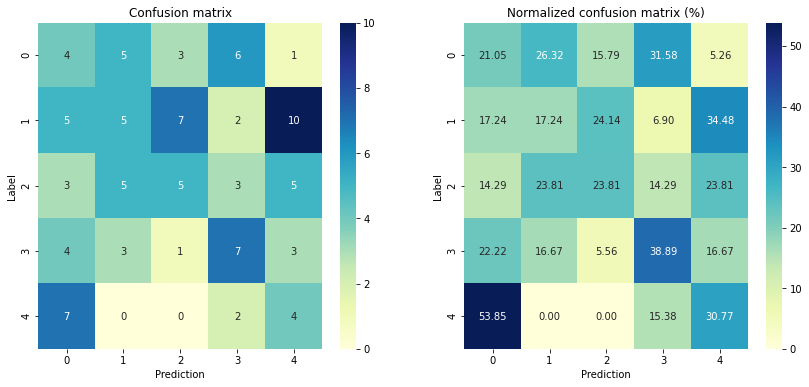

[0.25,
 0.21052631578947367,
 0.1724137931034483,
 0.23809523809523808,
 0.3888888888888889,
 0.3076923076923077,
 0.2528798679614296]

In [11]:
def get_accs(label,prediction, show=True):
    cm = confusion_matrix(label,prediction)
    length = cm.shape[0]
    num_cases = len(label)
    # global accuracy
    glb_acc = np.trace(cm)/len(label)
    ind_accs = cm/np.sum(cm,axis=1)[:, np.newaxis]
    accs = [ind_accs[i,i] for i in range(length)]
    accs.insert(0,glb_acc)
    # G-mean
    accs.append(geometric_mean_score(label, prediction,correction=0.001))

    if show:
        plt.figure(figsize=(14, 6))
        plt.subplot(1,2,1)
        sns.heatmap(cm, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='g',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Confusion matrix')
        plt.subplot(1,2,2)
        sns.heatmap(ind_accs*100, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='.2f',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Normalized confusion matrix (%)')
        plt.show()
    return accs
get_accs(np.random.randint(5, size=100),np.random.randint(5, size=100))

# Prepare the balance dataset


### SMOTE


In [12]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [18]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0: 706, 1: 706, 2: 706, 3: 706, 4: 706})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
X_rus

array([[-0.84705052, -0.0960161 , -0.02550204, ...,  0.10843282,
         0.66484328,  1.8593243 ],
       [-0.84705052, -0.0960161 , -0.02550204, ...,  0.30158535,
         0.09387145, -0.53782979],
       [-0.84705052, -0.0960161 , -0.02550204, ...,  0.10843282,
         1.57839821, -0.53782979],
       ...,
       [-0.84705052, -0.0960161 , -0.02550204, ...,  0.68789042,
        -1.61904404, -0.53782979],
       [ 0.59783785, -0.0960161 , -0.02550204, ...,  0.10843282,
        -0.59129474, -0.53782979],
       [-0.84705052, -0.0960161 , -0.02550204, ...,  0.10843282,
         1.74968976, -0.53782979]])

### BorderlineSMOTE


# Applying traditional machine learning algorithms


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB

LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


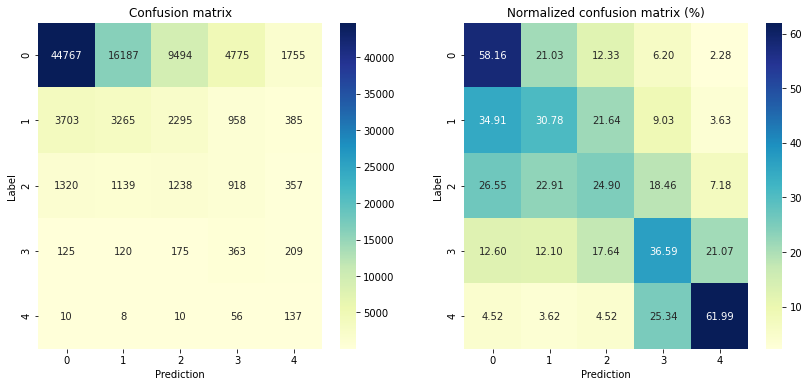

DT


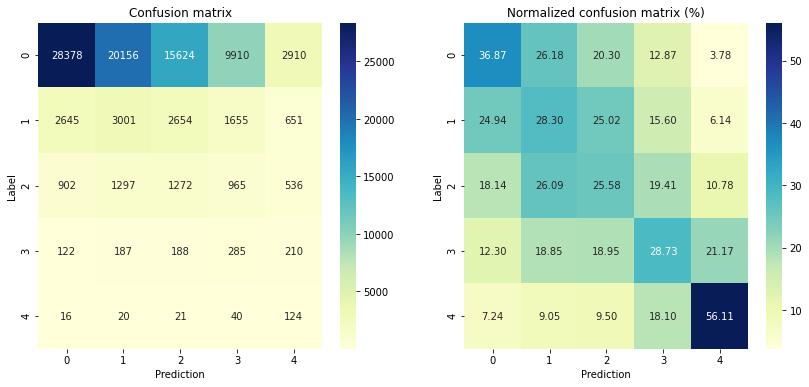

RF


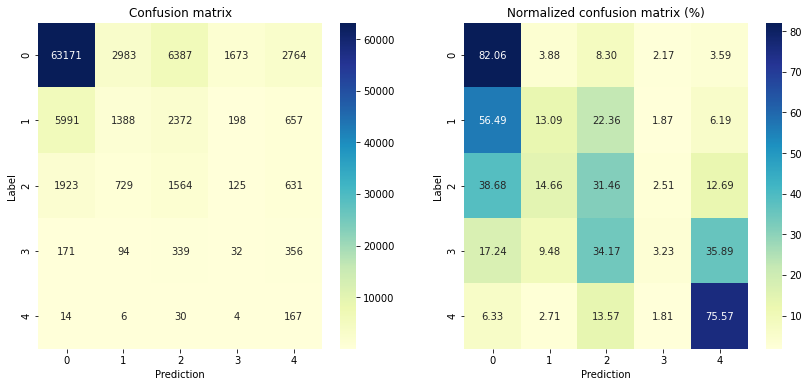

GNB


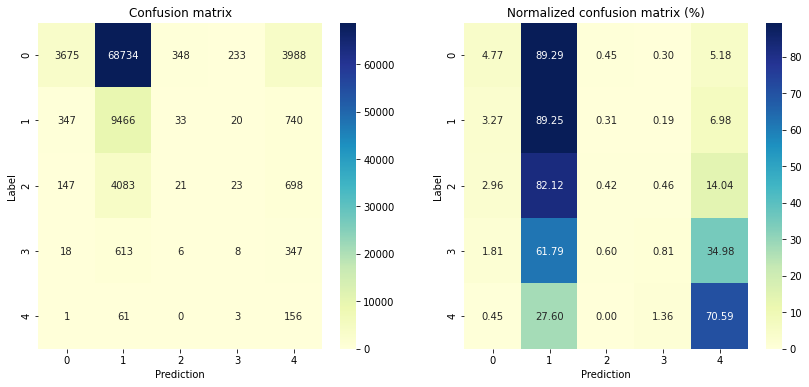

SGD


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


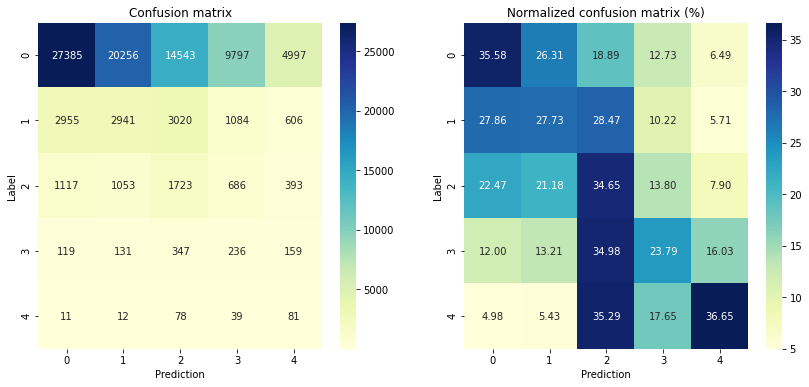

         LR        DT        RF       GNB       SGD
0  0.530772  0.352569  0.707291  0.142115  0.345167
1  0.581556  0.368651  0.820637  0.047741  0.355751
2  0.307845  0.282953  0.130869  0.892514  0.277296
3  0.248994  0.255833  0.314562  0.004224  0.346541
4  0.365927  0.287298  0.032258  0.008065  0.237903
5  0.619910  0.561086  0.755656  0.705882  0.366516
6  0.398995  0.336302  0.241619  0.063402  0.312512
7  0.415696  0.087121  0.767962  0.129819  0.046426


In [21]:
LR = LogisticRegression(solver = 'lbfgs')
DT = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(max_depth=2, random_state=0)
GNB = GaussianNB()
#CNB = ComplementNB()
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

clfs = [LR,DT,RF,GNB,SGD]
clf_names = ['LR','DT','RF','GNB','SGD']
rsts = pd.DataFrame()
for model, name in zip(clfs,clf_names):
  start = time.time()
  print(name)
  model.fit(X_rus, y_rus)
  # use the model to make predictions with the test data
  y_pred = model.predict(X_test)
  end= time.time()
  # get the evaluation metrics
  result = get_accs(y_test,y_pred,True)
  result.append(end-start)
  rsts[name] = result
print(rsts)

In [22]:
index = ['Global accuracy', 'Class 1','Class 2','Class 3','Class 4','Class 5','G-mean','Training time']
rsts.index = index
rsts

,LR,DT,RF,GNB,SGD
Global accuracy,0.530772,0.352569,0.707291,0.142115,0.345167
Class 1,0.581556,0.368651,0.820637,0.047741,0.355751
Class 2,0.307845,0.282953,0.130869,0.892514,0.277296
Class 3,0.248994,0.255833,0.314562,0.004224,0.346541
Class 4,0.365927,0.287298,0.032258,0.008065,0.237903
Class 5,0.619910,0.561086,0.755656,0.705882,0.366516
G-mean,0.398995,0.336302,0.241619,0.063402,0.312512
Training time,0.415696,0.087121,0.767962,0.129819,0.046426


# A simple MLP


In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [24]:
MLP = tf.keras.Sequential([
    keras.layers.Dense(5, activation='relu',input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5),
])
MLP.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
111/111 [==============================] - 2s 19ms/step - loss: 2.3559 - accuracy: 0.2317 - val_loss: 2.0340 - val_accuracy: 0.1229
Epoch 2/10
111/111 [==============================] - 2s 17ms/step - loss: 1.8695 - accuracy: 0.2255 - val_loss: 1.8270 - val_accuracy: 0.1466
Epoch 3/10
111/111 [==============================] - 2s 17ms/step - loss: 1.6968 - accuracy: 0.2374 - val_loss: 1.7037 - val_accuracy: 0.1883
Epoch 4/10
111/111 [==============================] - 2s 17ms/step - loss: 1.6391 - accuracy: 0.2422 - val_loss: 1.6258 - val_accuracy: 0.3412
Epoch 5/10
111/111 [==============================] - 2s 17ms/step - loss: 1.6139 - accuracy: 0.2547 - val_loss: 1.5809 - val_accuracy: 0.3858
Epoch 6/10
111/111 [==============================] - 2s 17ms/step - loss: 1.5735 - accuracy: 0.2552 - val_loss: 1.5537 - val_accuracy: 0.4175
Epoch 7/10
111/111 [==============================] - 2s 17ms/step - loss: 1.5567 - accuracy: 0.2657 - val_loss: 1.5427 - val_accuracy: 0.4268

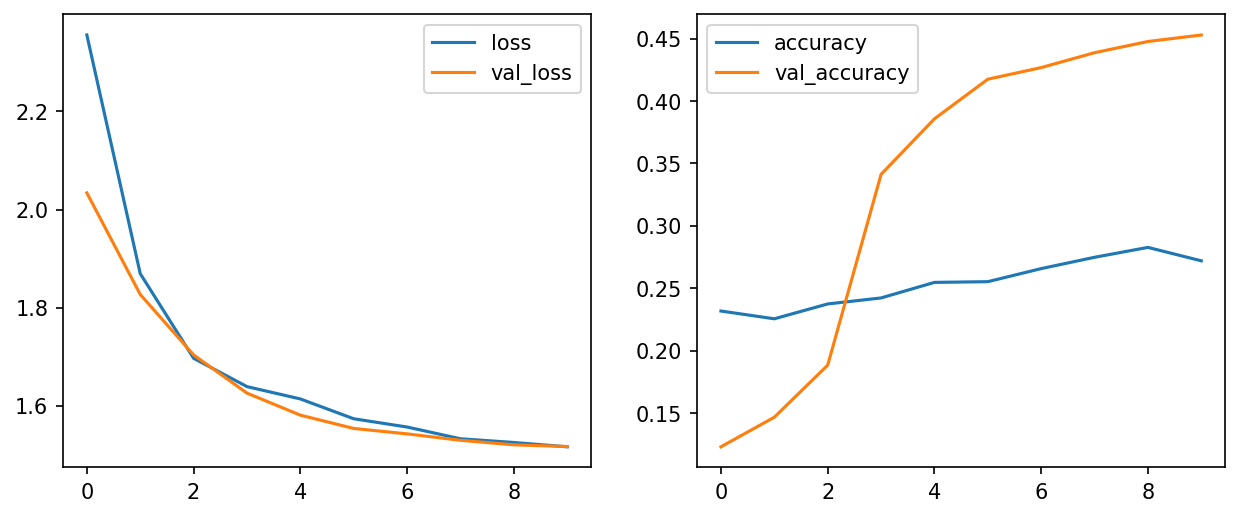

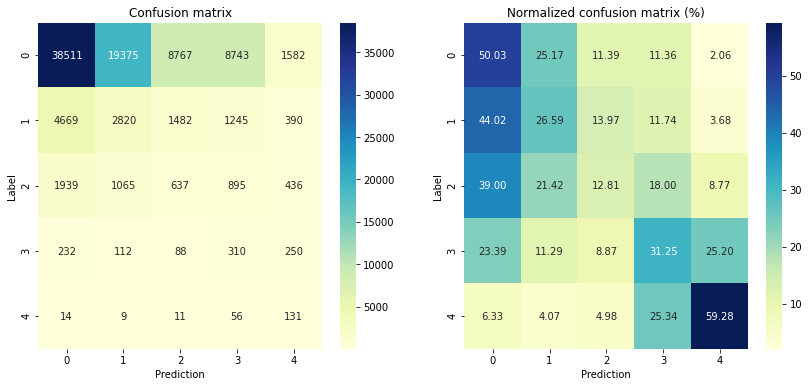

,LR,DT,RF,GNB,SGD,MLP
Global accuracy,0.530772,0.352569,0.707291,0.142115,0.345167,0.452271
Class 1,0.581556,0.368651,0.820637,0.047741,0.355751,0.500286
Class 2,0.307845,0.282953,0.130869,0.892514,0.277296,0.265887
Class 3,0.248994,0.255833,0.314562,0.004224,0.346541,0.128117
Class 4,0.365927,0.287298,0.032258,0.008065,0.237903,0.312500
Class 5,0.619910,0.561086,0.755656,0.705882,0.366516,0.592760
G-mean,0.398995,0.336302,0.241619,0.063402,0.312512,0.316119
Training time,0.415696,0.087121,0.767962,0.129819,0.046426,21.195560


In [26]:
start = time.time()
Monitor_MLP = MLP.fit(X_rus, y_rus, callbacks=[es],validation_data = (X_val,y_val), 
                      verbose = 1, epochs = 10)
# use the model to make predictions with the test data
y_pred = MLP.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
end= time.time()

# Show evolution of the training process
hist = pd.DataFrame(Monitor_MLP.history)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4),dpi=150)
hist[['loss','val_loss']].plot(ax=axes[0])
hist[['accuracy','val_accuracy']].plot(ax=axes[1])
plt.show()
# get the evaluation metrics
result = get_accs(y_test,y_pred,True)
result.append(end-start)

rsts['MLP'] = result
rsts

# Easy ensemble - major voting


In [27]:
from sklearn.ensemble import VotingClassifier

In [28]:
emts = [(name,cls) for name, cls in zip(clf_names,clfs)]

In [34]:
eclf = VotingClassifier(estimators=emts)

Ensemble


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


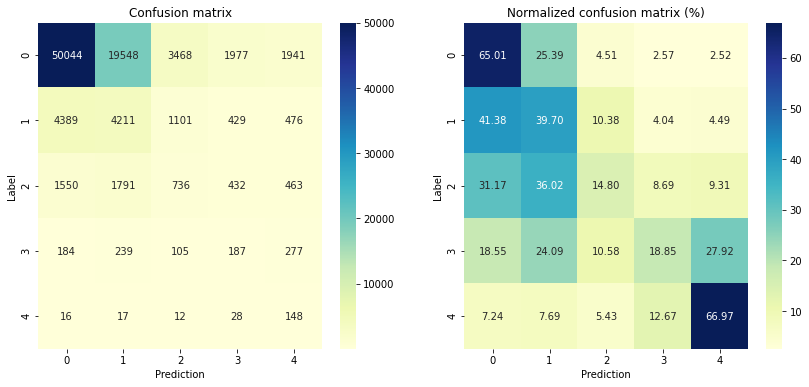

,LR,DT,RF,GNB,SGD,MLP,Ensemble
Global accuracy,0.530772,0.352569,0.707291,0.142115,0.345167,0.452271,0.590024
Class 1,0.581556,0.368651,0.820637,0.047741,0.355751,0.500286,0.650108
Class 2,0.307845,0.282953,0.130869,0.892514,0.277296,0.265887,0.397039
Class 3,0.248994,0.255833,0.314562,0.004224,0.346541,0.128117,0.148029
Class 4,0.365927,0.287298,0.032258,0.008065,0.237903,0.312500,0.188508
Class 5,0.619910,0.561086,0.755656,0.705882,0.366516,0.592760,0.669683
G-mean,0.398995,0.336302,0.241619,0.063402,0.312512,0.316119,0.344091
Training time,0.415696,0.087121,0.767962,0.129819,0.046426,21.195560,2.129570


In [35]:
#predict class probabilities for all classifiers
name = 'Ensemble'
start = time.time()
print(name)
eclf.fit(X_rus, y_rus)
# use the model to make predictions with the test data
y_pred = eclf.predict(X_test)
end= time.time()
# get the evaluation metrics
result = get_accs(y_test,y_pred,True)
result.append(end-start)
rsts[name] = result
rsts

# Variables


In [ ]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DT                       DecisionTreeClassifier    DecisionTreeClassifier(cc<...>state=0, splitter='best')
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GNB                      GaussianNB                GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB               ABCMeta                   <class 'sklearn.naive_bayes.GaussianNB'>
LR                       LogisticRegression        LogisticRegression(C=1.0,<...>bose=0, warm_start=False)
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MLP                      Sequential                <tensorflow.python.keras.<...>object at 0x7f4374668cc0>
Monitor_MLP              History                   <tensorflow.python.keras.<...>object at 0x7f436dd3d668>
RF                       RandomForestClassifier 